# Clustering con Python

### Importar el dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
red_wine = pd.read_csv("../datasets/wine/winequality-red.csv", sep=";")
white_wine = pd.read_csv("../datasets/wine/winequality-white.csv", sep=";")

In [4]:
df = pd.concat([red_wine, white_wine], axis=0)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(array([  30.,  216.,    0., 2138.,    0., 2836., 1079.,    0.,  193.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

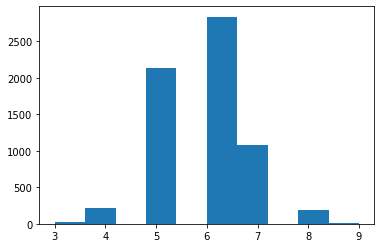

In [6]:
plt.hist(df["quality"])

In [7]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [8]:
contingency_table = pd.crosstab(df["quality"], len(df))
contingency_table

col_0,6497
quality,
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


### Normalización de los datos

In [9]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,0.500000
4894,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,0.333333
4895,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,0.500000
4896,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,0.666667


## Clustering jerárquico con sklearn

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
clus = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

In [22]:
md_h = pd.Series(clus.labels_)

Text(0, 0.5, 'Número de vinos del cluster')

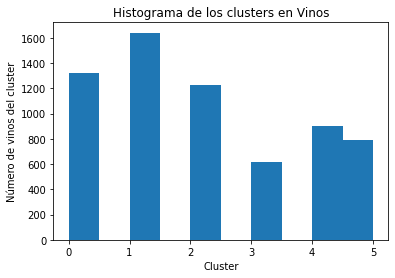

In [23]:
plt.hist(md_h)
plt.title("Histograma de los clusters en Vinos")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [14]:
clus.children_

array([[    0,     4],
       [ 1386,  1387],
       [  757,   758],
       ...,
       [12986, 12988],
       [12985, 12990],
       [12989, 12991]])

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [16]:
Z = linkage(df_norm, "ward")

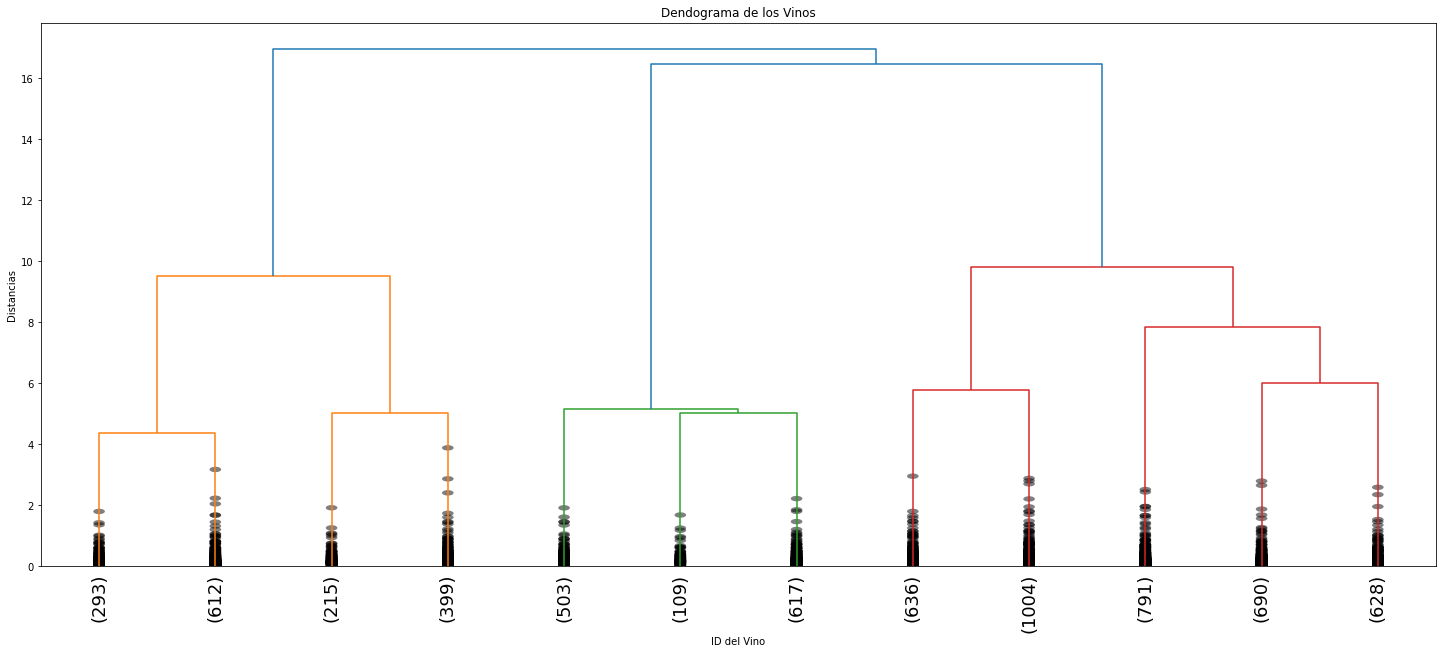

In [17]:
plt.figure(figsize=(25,10))
plt.title("Dendograma de los Vinos")
plt.xlabel("ID del Vino")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=18.0, 
           truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True)
plt.show()

## K-Means

In [19]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [20]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(n_clusters=6)

In [21]:
model.labels_

array([2, 2, 2, ..., 3, 4, 4], dtype=int32)

In [24]:
md_k = pd.Series(model.labels_)

In [25]:
df_norm["cluster_h"] = md_h
df_norm["cluster_k"] = md_k

In [26]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_h,cluster_k
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,4,2
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,4,2
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,4,2
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,3,0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,4,2


(array([ 503.,    0., 1728.,    0., 1000.,    0., 1087.,    0., 1213.,
         966.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

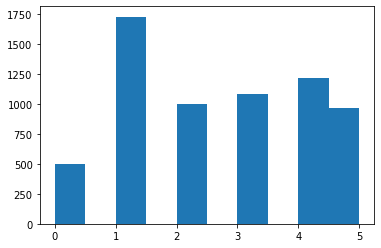

In [27]:
plt.hist(md_k)

In [44]:
model.cluster_centers_

array([[0.52710185, 0.2166004 , 0.2846655 , 0.03285044, 0.15231865,
        0.04221201, 0.07014594, 0.20573302, 0.36515789, 0.29907074,
        0.37936631, 0.49337309],
       [0.26298718, 0.14126184, 0.21326698, 0.14827109, 0.07767827,
        0.14945753, 0.37721899, 0.18725895, 0.31889001, 0.15211203,
        0.19405587, 0.40830918],
       [0.30335537, 0.35598333, 0.09301807, 0.02877607, 0.11939535,
        0.05412153, 0.10768664, 0.1787353 , 0.49296124, 0.20854494,
        0.29645169, 0.3775    ],
       [0.28929418, 0.11859681, 0.20743267, 0.05722988, 0.05500202,
        0.09159901, 0.25182976, 0.10982375, 0.29148854, 0.14043911,
        0.41961228, 0.43612132],
       [0.23428562, 0.15067215, 0.19387178, 0.04745765, 0.04812627,
        0.09958562, 0.23180672, 0.07860558, 0.39989792, 0.1609932 ,
        0.61262003, 0.63045267],
       [0.21974402, 0.1076501 , 0.18815012, 0.06378923, 0.06137066,
        0.11618825, 0.30390536, 0.1346092 , 0.49785738, 0.17220904,
        0.3347561 ,

In [45]:
model.inertia_

452.5326264389757

## Interpretación final

In [31]:
df_norm.groupby("cluster_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_h
cluster_k,,,,,,,,,,,,,
0,0.392665,0.176793,0.246705,0.056666,0.107009,0.079420,0.191671,0.172257,0.375321,0.225512,0.351347,0.489823,3.050050
1,0.250787,0.132195,0.190272,0.091450,0.061703,0.120217,0.300454,0.133184,0.358078,0.152128,0.370216,0.477358,1.687299
2,0.288890,0.241807,0.159474,0.056893,0.092685,0.086926,0.211797,0.161064,0.434390,0.181948,0.317788,0.432912,3.896733
3,0.241958,0.131930,0.193117,0.087072,0.060542,0.118366,0.294314,0.125311,0.350648,0.151685,0.391644,0.482517,2.323077
4,0.245361,0.147769,0.194455,0.083709,0.064967,0.110277,0.274530,0.131484,0.384214,0.164837,0.408524,0.498106,1.861364
5,0.252745,0.131822,0.199801,0.089803,0.062512,0.118936,0.293858,0.133376,0.363964,0.161297,0.383750,0.477880,0.758213
